
# DataSets, Data Loaders and Transforms

In [2]:
import torchvision
import torch
import os
import matplotlib.pyplot as plt
import numpy as np


In [3]:
os.getcwd()

'C:\\Users\\Asus'

In [12]:
dir_path= 'C:\\Users\\Asus\\pytorch-basics-part2'

# Convert From Tensor to Numpy for Displaying Images

In [5]:
def convert_to_numpy(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    return inp


# MNIST DataSet
  ### 1. Compose Transform###


In [13]:
transform_img     = torchvision.transforms.Compose([torchvision.transforms.Resize((256, 256)),
                                                         torchvision.transforms.ToTensor(), 
                                                    torchvision.transforms.Normalize(mean=[0.485],std=[0.229])])
  

In [14]:
transform_img

Compose(
    Resize(size=(256, 256), interpolation=PIL.Image.BILINEAR)
    ToTensor()
    Normalize(mean=[0.485], std=[0.229])
)

### 2. Create Dataset###

In [16]:

dataset_mnist_train =  torchvision.datasets.MNIST(dir_path, train=True, transform=transform_img, 
                                                                   target_transform=None, download=True)

In [18]:
dataset_mnist_train[0]

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]]]), 5)

In [19]:
dataset_mnist_train[1]

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]]]), 0)

### 3. Create DataLoader###

In [46]:
dataloader_mnist_train= torch.utils.data.DataLoader(dataset_mnist_train, batch_size=32,
                                             shuffle=True, num_workers=1)

### 4. Check The Data ###

In [47]:
images, classes = next(iter(dataloader_mnist_train))
out = torchvision.utils.make_grid(images)


In [49]:
images.shape

torch.Size([32, 1, 256, 256])

In [51]:
out.shape

torch.Size([3, 1034, 2066])

In [52]:
images_numpy=convert_to_numpy(out)

In [53]:
images_numpy.shape

(1034, 2066, 3)

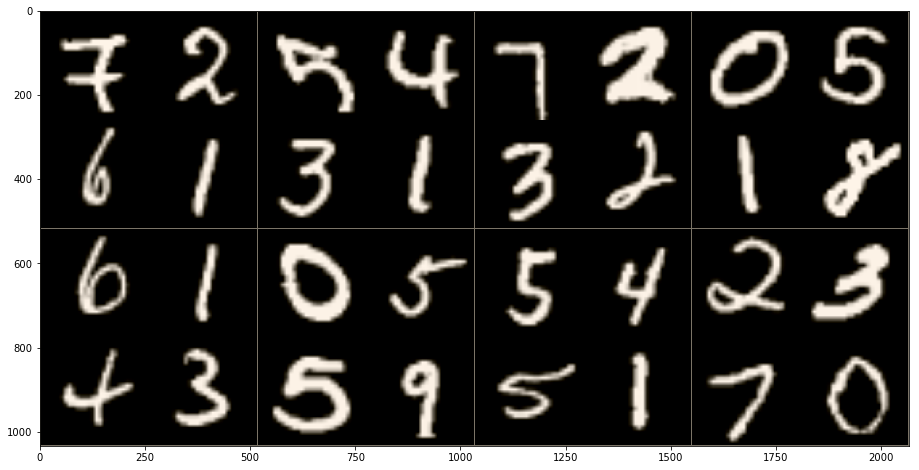

In [54]:
fig = plt.figure(figsize=(20, 8))
plt.imshow(images_numpy)

In [55]:
print(classes)

tensor([7, 2, 5, 4, 7, 2, 0, 5, 6, 1, 3, 1, 3, 2, 1, 8, 6, 1, 0, 5, 5, 4, 2, 3,
        4, 3, 5, 9, 5, 1, 7, 0])


# 2. FasionMNIST DataSet


In [56]:

transform_img     = torchvision.transforms.Compose([torchvision.transforms.Resize((256, 256)),
                                                         torchvision.transforms.ToTensor(),
                                                         torchvision.transforms.Normalize(mean=[0.485],std=[0.229])])

dataset_fashion_mnist_train =  torchvision.datasets.FashionMNIST(dir_path, train=True, transform=transform_img, 
                                                                   target_transform=None, download=True)

dataloader_fashionmnist_train= torch.utils.data.DataLoader(dataset_fashion_mnist_train, batch_size=8,
                                             shuffle=True, num_workers=4)

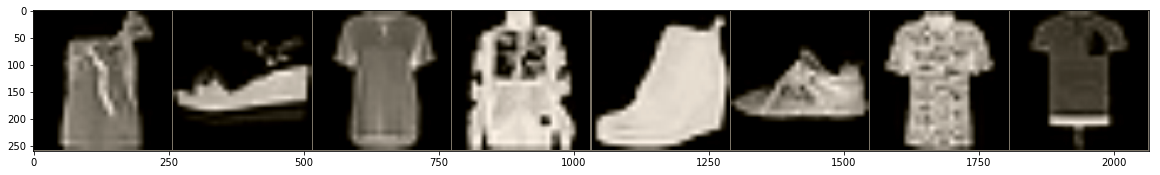

In [57]:
images, classes = next(iter(dataloader_fashionmnist_train))
out = torchvision.utils.make_grid(images)
images_numpy=convert_to_numpy(out)
fig = plt.figure(figsize=(20, 8))
plt.imshow(images_numpy)

In [58]:
print(classes)

tensor([6, 5, 6, 4, 9, 7, 6, 0])


# 3. SBU DataSet


In [59]:

dir_path= 'C:\\Users\\Asus\\pytorch-basics-part2'
transform_img       =     torchvision.transforms.Compose([
                                torchvision.transforms.Resize(256),
                                torchvision.transforms.CenterCrop(224),
                                torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])] )

dataset_sbu_train=torchvision.datasets.SBU(dir_path, transform=transform_img, target_transform=None, download=True)
dataloader_sbu_train= torch.utils.data.DataLoader(dataset_sbu_train, batch_size=8,
                                             shuffle=True, num_workers=4)


Files already downloaded and verified


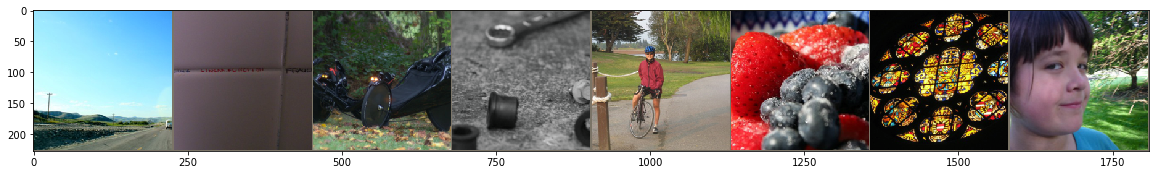

In [60]:
images, classes = next(iter(dataloader_sbu_train))
out = torchvision.utils.make_grid(images)
images_numpy=convert_to_numpy(out)
fig = plt.figure(figsize=(20, 8))
plt.imshow(images_numpy)

In [61]:
print(classes)

(' I love that little white hippie van in front of us.', " The first-floor women's bathroom in Canaday library is covered with pun-filled graffiti like this.  I cannot resist a pun!", ' There is a black cat in my back yard', ' Tools and bearings all over the floor a sure sign of work being done!', ' we stopped to check on the geese (who are off in the lake to the left of the frame) on our morning bike ride.', ' bowl of fruit (that was consumed by me soon after this was taken)', ' Stained glass window in the Ridderzaal', ' Rachel up in the tree house that is still being built.')


# 4. DataSet : Image Folder

In [62]:
data_path = 'C://Users//Asus//hymenoptera_data'
transform_img       =     torchvision.transforms.Compose([
                                torchvision.transforms.Resize(256),
                                torchvision.transforms.CenterCrop(224),
                                torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])] )

dataset_img_folder= torchvision.datasets.ImageFolder(os.path.join(data_path, 'train'),
                                          transform_img)

dataloader_img_folder= torch.utils.data.DataLoader(dataset_img_folder, batch_size=8,
                                             shuffle=True, num_workers=4)

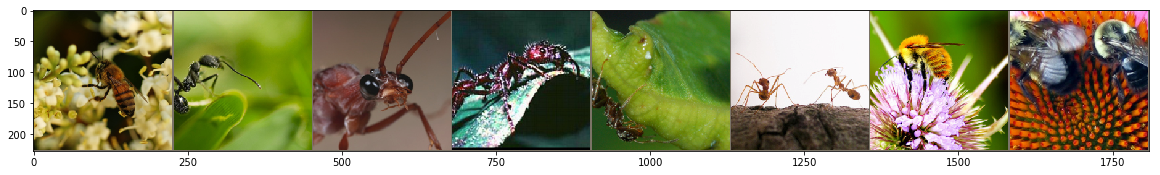

In [63]:
images, classes = next(iter(dataloader_img_folder))
out = torchvision.utils.make_grid(images)
images_numpy=convert_to_numpy(out)
fig = plt.figure(figsize=(20, 8))
plt.imshow(images_numpy)

In [64]:
classes

tensor([1, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
dataset_voc_train =  torchvision.datasets.VOCDetection(dir_path, year='2012', image_set='train', download=True, transform=transform_img)

In [ ]:
images, labels=dataset_voc_train[6]

In [ ]:
images.shape

In [ ]:
fig = plt.figure(figsize=(8, 8))

plt.imshow(convert_to_numpy(images))

In [ ]:
labels

In [ ]:
dataset_mnist_train

In [ ]:
dataset_mnist_train[3]

# DataSet2: CIFAR

In [ ]:
dataset_cifar_train  =    torchvision.datasets.CIFAR100(dir_path, train=True, transform=transform_img, target_transform=None, download=True)
#dataset_imagenet_train  =    torchvision.datasets.SBU(dir_path, transform=transform_img,  download=True)

In [ ]:
dataset_cifar_train[0]

In [ ]:
image, label = dataset_cifar_train[2]

In [ ]:
image.shape

In [ ]:
def convert_to_numpy(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    return inp


In [ ]:
plt.imshow(convert_to_numpy(image))

In [ ]:
stl10_dataset_train=torchvision.datasets.STL10(dir_path, split='train', folds=None, 
                                               transform=transform_img, target_transform=None, download=True)

In [ ]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
cap = dset.CocoCaptions(dir_path,
                        annFile = 'json annotation file',
                        transform=transforms.ToTensor())

print('Number of samples: ', len(cap))
img, target = cap[3] # load 4th sample

print("Image Size: ", img.size())
print(target)